La valeur aberrante est une observation numériquement distante du reste des données ou, en termes simples, la valeur qui se situe hors de l'intervalle.

1. Hypothesis Testing
2. Z-score method
3. Robust Z-score
4. I.Q.R method
5. Winsorization method(Percentile Capping)
6. DBSCAN Clustering
7. Isolation Forest
8. Visualizing the data


In [ ]:
#1. Hypothesis Testing
import numpy as np
import scipy.stats as stats

x = np.array([12,13,14,19,21,23])
y = np.array([12,13,14,19,21,23,45])

def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Valeur calculée par Grubbs:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Valeur critique de Grubbs:",g_critical)
    if g_critical > g_calculated:
        print("A partir du test de Grubbs, nous observons que la valeur calculée est inférieure à la valeur critique, nous acceptons l'hypothèse nulle et concluons qu'il n'y a pas de valeurs aberrantes.\n")
    else:
        print("A partir du test de Grubbs, nous observons que la valeur calculée est supérieure à la valeur critique, rejetons l'hypothèse nulle et concluons qu'il y a une valeur aberrante.\n")
grubbs_test(x)
grubbs_test(y)

Valeur calculée par Grubbs: 1.4274928542926593
Valeur critique de Grubbs: 1.887145117792422
A partir du test de Grubbs, nous observons que la valeur calculée est inférieure à la valeur critique, nous acceptons l'hypothèse nulle et concluons qu'il n'y a pas de valeurs aberrantes.

Valeur calculée par Grubbs: 2.2765147221587774
Valeur critique de Grubbs: 2.019968507680656
A partir du test de Grubbs, nous observons que la valeur calculée est supérieure à la valeur critique, rejetons l'hypothèse nulle et concluons qu'il y a une valeur aberrante.



In [ ]:
#2. Z-score method
import pandas as pd
import numpy as np
y = pd.DataFrame(y)
x = pd.DataFrame(x)
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(y[0])

Outliers: []


In [ ]:
#3. ROBUST Z-SCORE

import pandas as pd
import numpy as np
y = pd.DataFrame(y)
x = pd.DataFrame(x)
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
ZRscore_outlier(y[0])

Outliers: []


In [ ]:
#4. IQR METHOD
import pandas as pd
import numpy as np
#df = pd.read_csv()
y = pd.DataFrame(y)
x = pd.DataFrame(x)
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(y[0])

Outliers: [45]


In [ ]:
#5. WINSORIZATION METHOD(PERCENTILE CAPPING)
import pandas as pd
import numpy as np
y = pd.DataFrame(y)
x = pd.DataFrame(x)
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
Winsorization_outliers(y[0])

Outliers: [12, 45]


In [ ]:
#6. DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)
import pandas as pd
from sklearn.cluster import DBSCAN
y = pd.DataFrame(y)
x = pd.DataFrame(x)
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))
DB_outliers(y[0])

-1    7
Name: cluster, dtype: int64


In [ ]:
#7. ISOLATION FOREST
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
y = pd.DataFrame(y)
x = pd.DataFrame(x)
y[0].fillna(y[0].median(),inplace=True)
x[0].fillna(x[0].median(),inplace=True)
def Iso_outliers(df):
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    preds = iso.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))
Iso_outliers(y[0]) 

 1    6
-1    1
Name: cluster, dtype: int64


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


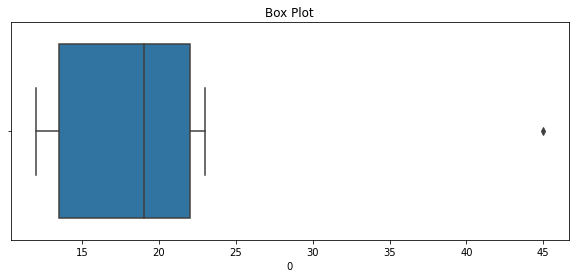

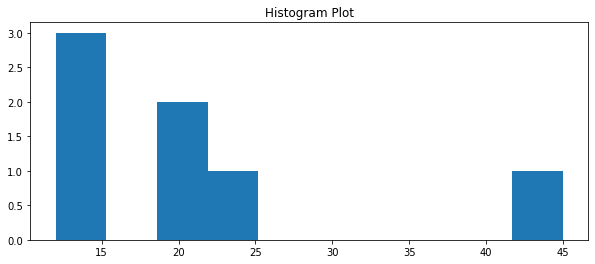

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


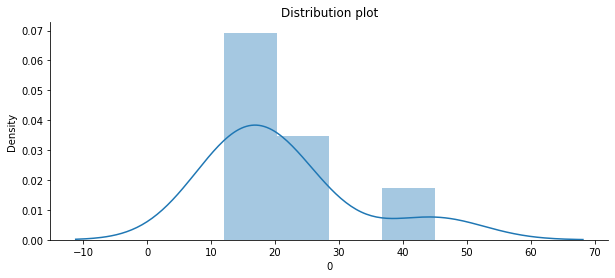

<Figure size 720x288 with 0 Axes>

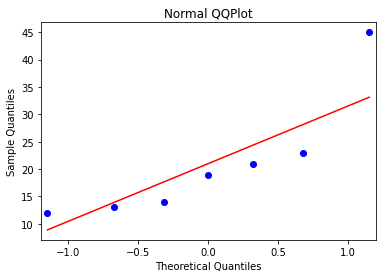

In [ ]:
#8. VISUALIZING THE DATA
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
y = pd.DataFrame(y)
x = pd.DataFrame(x)

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(y[0])

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(y[0])

#def scatter_plots(df1,df2):
 #   fig, ax = plt.subplots(figsize=(10,4))
 #   ax.scatter(df1,df2)
 #   ax.set_xlabel('Age')
 #   ax.set_ylabel('Fare')
 #   plt.title("Scatter Plot")
 #   plt.show()
#scatter_plots(train['Age'],train['Fare'])

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(y[0])

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(y[0])

Effect : 
* Les valeurs aberrantes affectent gravement la moyenne et l'écart-type de l'ensemble de données. Elles peuvent donner des résultats statistiquement erronés.
* Elles augmentent la variance des erreurs et réduisent la puissance des tests statistiques.
* Si les valeurs aberrantes sont distribuées de manière non aléatoire, elles peuvent diminuer la normalité.
* La plupart des algorithmes d'apprentissage automatique ne fonctionnent pas bien en présence de valeurs aberrantes. Il est donc souhaitable de détecter et de supprimer les valeurs aberrantes.
* Elles peuvent également avoir un impact sur l'hypothèse de base de la régression, de l'ANOVA et d'autres hypothèses de modèles statistiques.

Les traiter avant de construire un algorithme de ML

1. Suppression des observations.
2. Transformer des valeurs.
3. Imputation.
4. Traitement séparé

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


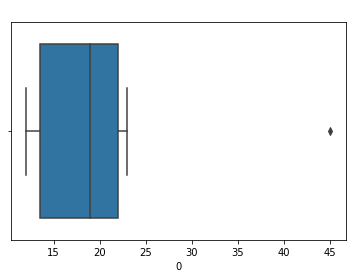

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


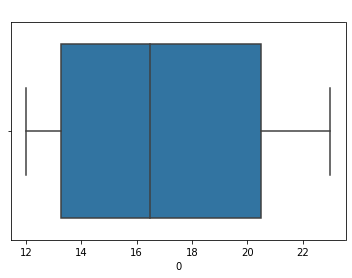

In [ ]:
#1. Suppression des observations.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
y = pd.DataFrame(y)
x = pd.DataFrame(x)

sns.boxplot(y[0])
plt.title(" ")
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(y, 0)
sns.boxplot(y[0])
plt.title(" ")
plt.show()

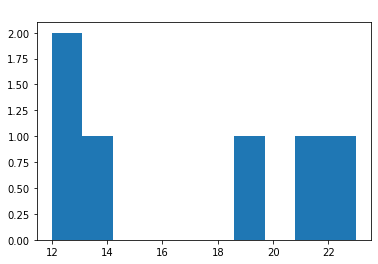

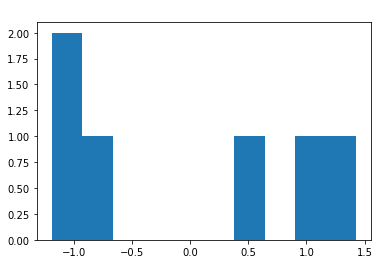

In [ ]:
#2. Transformer des valeurs.
#Scalling
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

y = pd.DataFrame(y)
x = pd.DataFrame(x)

plt.hist(y[0])
plt.title(" ")
plt.show()
scaler = preprocessing.StandardScaler()
y[0] = scaler.fit_transform(y[0].values.reshape(-1,1))
plt.hist(y[0])
plt.title(" ")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


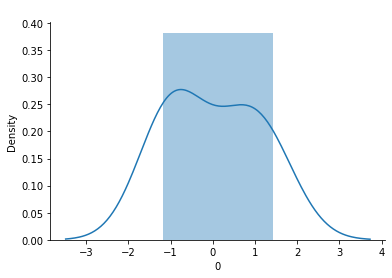

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


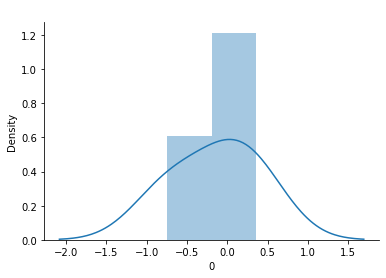

In [ ]:
#2. Transformer des valeurs.
#Log Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

y = pd.DataFrame(y)
x = pd.DataFrame(x)

sns.distplot(y[0])
plt.title(" ")
sns.despine()
plt.show()
y[0] = np.log(y[0])
sns.distplot(y[0])
plt.title(" ")
sns.despine()
plt.show()

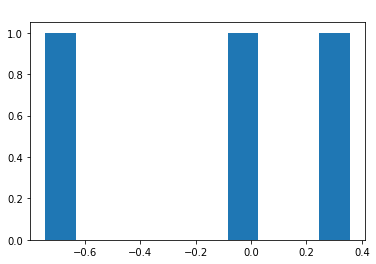

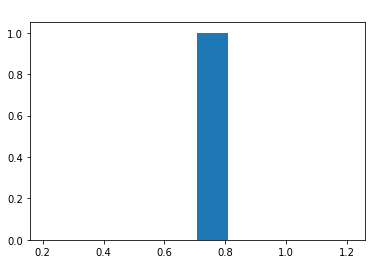

In [ ]:
#2. Transformer des valeurs.
#cube root Transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

y = pd.DataFrame(y)
x = pd.DataFrame(x)

plt.hist(y[0])
plt.title(" ")
plt.show()
y[0] = (y[0]**(1/3))
plt.hist(y[0])
plt.title(" ")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


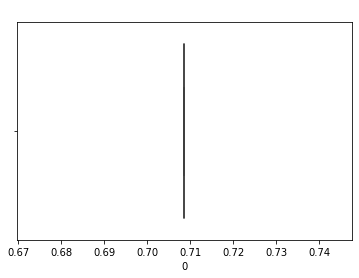

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


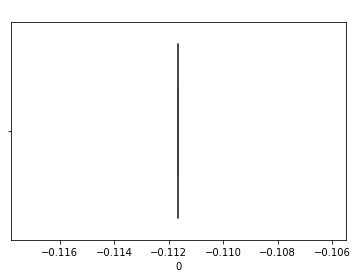

In [ ]:
#2. Transformer des valeurs.
#Box-transformation
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

y = pd.DataFrame(y)
x = pd.DataFrame(x)

sns.boxplot(y[0])
plt.title(" ")
plt.show()
y[0],fitted_lambda= scipy.stats.boxcox(y[0] ,lmbda=None)
sns.boxplot(y[0])
plt.title(" ")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


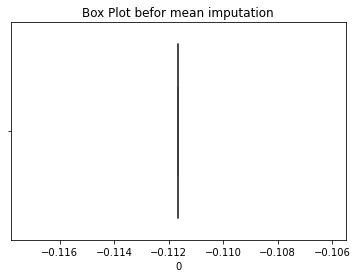

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


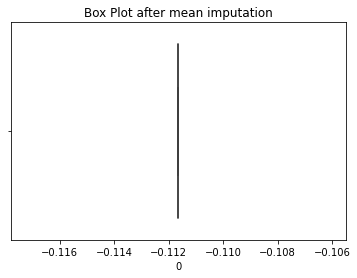

In [ ]:
#3. Imputation.
#mean imputation
import pandas as pd
import numpy as np

y = pd.DataFrame(y)
x = pd.DataFrame(x)

sns.boxplot(y[0])
plt.title("Box Plot befor mean imputation")
plt.show()
q1 = y[0].quantile(0.25)
q3 = y[0].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(y[0])
for i in y[0]:
    if i > Upper_tail or i < Lower_tail:
            y[0] = y[0].replace(i, m)
sns.boxplot(y[0])
plt.title("Box Plot after mean imputation")
plt.show()   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


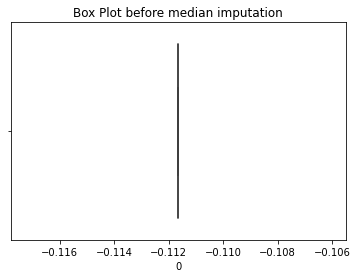

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


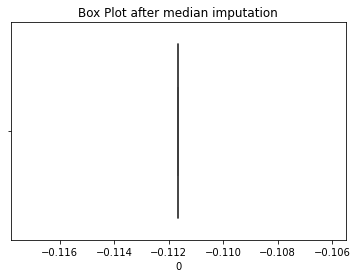

In [ ]:
#3. Imputation.
#median imputation
import pandas as pd
import numpy as np

y = pd.DataFrame(y)
x = pd.DataFrame(x)

sns.boxplot(y[0])
plt.title("Box Plot before median imputation")
plt.show()
q1 = y[0].quantile(0.25)
q3 = y[0].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(y[0])
for i in y[0]:
    if i > Upper_tail or i < Lower_tail:
            y[0] = y[0].replace(i, med)
sns.boxplot(y[0])
plt.title("Box Plot after median imputation")
plt.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


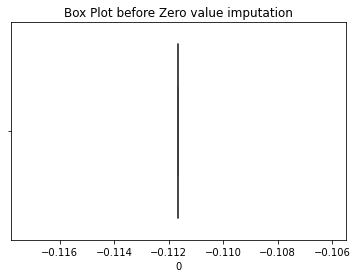

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


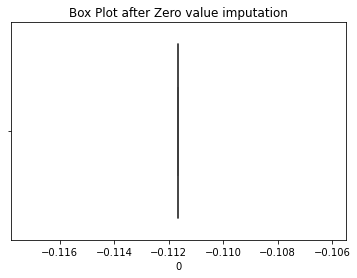

In [ ]:
#3. Imputation.
#Zero value imputation
import pandas as pd
import numpy as np

y = pd.DataFrame(y)
x = pd.DataFrame(x)

sns.boxplot(y[0])
plt.title("Box Plot before Zero value imputation")
plt.show()
q1 = y[0].quantile(0.25)
q3 = y[0].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in y[0]:
    if i > Upper_tail or i < Lower_tail:
            y[0] = y[0].replace(i, 0)
sns.boxplot(y[0])
plt.title("Box Plot after Zero value imputation")
plt.show()      

Conclusion:
1. La médiane est la meilleure mesure de la tendance centrale lorsque les données sont aberrantes ou asymétriques.
2. La méthode de winsorization ou le plafonnement du percentile est la meilleure technique de détection des valeurs aberrantes.
3. L'imputation médiane élimine complètement les valeurs aberrantes.